# Yelp Data Challenge - NLP

BitTiger DS501

Jun 2017

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('yelp_dataset_challenge_round10/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


### Define your feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

In [15]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
print(documents.size)
print(documents[0:3])

325819
[ "What can I say.. Wowzers! Probably one of the best steak houses I've been too. Service was absolutely flawless and dinner was excellent . Ordered seafood tower, wedge, wagyu filet, chateaubriand, bacon grits and sautéed  mushrooms Will definitely be back!"
 'Went here for guys weekend. Unbelievable. Ravioli app was so good. The steak was very good too. When getting a good bottle of wine, make sure they decant it for you...had to ask.'
 "One word my friends: tableside!!! Yes, tableside carving of your steak chateaubriand for two/Creekstone farm steaks never disappoints. One of the best dinners I had this year for sure.  I would recommend Delmonico restaurant in Vegas who ever goes to Vegas or lives there.  \n\nDelmonico is settled within the Venetian hotel and with a 5 pm dinner reservation , they were pretty busy by 6 pm. I'm assuming people want to eat good streak before different shows and other entertainment in Vegas. Service was impeccable with the server and assistant bo

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [5]:
# Make a column and take the values, save to a variable named "target"
df['target'] = pd.cut(df['stars'], bins = [0,4,5] ,right = True, labels=["imperfect", "perfect"])

In [24]:
df.head(5)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,target
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w,perfect
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw,perfect
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg,perfect
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw,imperfect
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw,perfect


#### You may want to look at the statistic of the target variable

imperfect    173259
perfect      152560
Name: target, dtype: int64


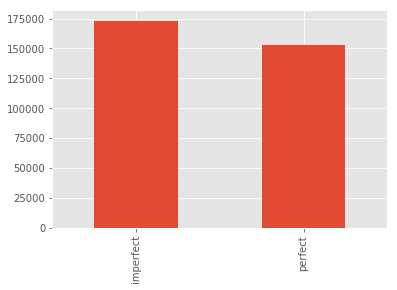

In [8]:
# To be implemented
import numpy as np
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

print(df['target'].value_counts())
df['target'].value_counts().plot.bar()

## Let's create training dataset and test dataset

In [6]:
from sklearn.cross_validation import train_test_split

/Users/Danielle/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Documents is your X, target is your y
X = documents
y = np.array(df['target'].values)
# Now split the data to training set and test set

In [10]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(X, y, test_size=0.05, random_state=11)

## Let's get NLP representation of the documents

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
vectors = vectorizer.fit_transform(documents).toarray()
words = vectorizer.get_feature_names()

In [13]:
# Train the model with your training data
X_train = vectorizer.transform(documents_train)

In [60]:
# Get the vocab of your tfidf
vocab = vectorizer.vocabulary_
print(vocab)

{'say': 1508, 'probably': 1356, 'best': 168, 'steak': 1681, 've': 1878, 'service': 1547, 'absolutely': 35, 'dinner': 505, 'excellent': 599, 'ordered': 1202, 'seafood': 1517, 'tower': 1823, 'wagyu': 1903, 'filet': 650, 'bacon': 124, 'grits': 766, 'mushrooms': 1122, 'definitely': 474, 'went': 1944, 'guys': 778, 'weekend': 1937, 'ravioli': 1396, 'app': 82, 'good': 743, 'getting': 719, 'bottle': 199, 'wine': 1955, 'make': 1025, 'sure': 1727, 'ask': 101, 'word': 1966, 'friends': 697, 'yes': 1993, 'steaks': 1683, 'year': 1988, 'recommend': 1413, 'restaurant': 1441, 'vegas': 1881, 'goes': 737, 'venetian': 1888, 'hotel': 849, 'pm': 1317, 'reservation': 1436, 'pretty': 1345, 'busy': 245, 'people': 1261, 'want': 1917, 'eat': 559, 'different': 497, 'shows': 1570, 'entertainment': 583, 'impeccable': 868, 'server': 1544, 'working': 1972, 'overly': 1214, 'looking': 998, 'liked': 970, 'overall': 1212, 'atmosphere': 107, 'white': 1949, 'walls': 1915, 'crisp': 435, 'tables': 1736, 'dim': 499, 'lighting

In [14]:
# Use the trained model to transform your test data
y_test = target_test
X_test = vectorizer.transform(documents_test)

## Similar review search engine

In [15]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[::1][:n]]


In [68]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
# Draw an arbitrary review from test (unseen in training) documents
arbitrary_review = documents_train[np.random.randint(documents_train.size-1)]
print(arbitrary_review)

WOW!!!  Stopped in on two occassions when I stayed at the Bellagio.  Their iced coffee was amazing!  The pastries were to die for!!!  We tried the chocolate covered strawberries, creme brulee & tirmitsu.  Excellently crafted.  I felt the prices were reasonable and expected them to be higher.  Definately stop in!


In [101]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
vectors = vectorizer.fit_transform(documents).toarray()
words = vectorizer.get_feature_names()
# Transform the drawn review(s) to vector(s)
vector_query = vectorizer.transform([arbitrary_review]).todense()
print ("Vectorized query:", vector_query)

Vectorized query: [[ 0.  0.  0. ...,  0.  0.  0.]]


In [117]:
X_train[-2].todense()

matrix([[ 0.       ,  0.       ,  0.0830747, ...,  0.       ,  0.       ,
          0.       ]])

In [118]:
# Calculate the similarity score(s) between vector(s) and training vectors
score = []
for i in range(documents_train.size-1):
    score.append(cosine_similarity(vector_query.reshape(1, -1), X_train[i].todense().reshape(1, -1)))

In [94]:
# Let's find top 5 similar reviews
n = 5
pass

In [104]:
print ('Our search query:')
print (arbitrary_review)

Our search query:
WOW!!!  Stopped in on two occassions when I stayed at the Bellagio.  Their iced coffee was amazing!  The pastries were to die for!!!  We tried the chocolate covered strawberries, creme brulee & tirmitsu.  Excellently crafted.  I felt the prices were reasonable and expected them to be higher.  Definately stop in!


In [122]:
print ('Most %s similar reviews:' % n)
print (get_top_values(score, n, documents_train))

Most 5 similar reviews:
[array([[ 'We came on a Sat morning for breakfast, it was 2/3 full in the restaurants, the line was short thou.  \n\nMom ordered the hen house and she really loved it!  Hubby had the rueben sandwich with side salad instead of fries, it was delicious! I had the huevo ranchos and elvis, huevo ranchos was not impressed and it looked kinda sloppy.  The french toast was good so it kinda make up for it, it was stuffed with banana, bacon, and peanut butter. Nothing can beat sweet and savory! \n\nThe food came out so slow, even slower than a regular restaurant.  Not sure why! However the servers there were awesome! Very friendly and welcoming.']], dtype=object), array([[ 'We came on a Sat morning for breakfast, it was 2/3 full in the restaurants, the line was short thou.  \n\nMom ordered the hen house and she really loved it!  Hubby had the rueben sandwich with side salad instead of fries, it was delicious! I had the huevo ranchos and elvis, huevo ranchos was not impres

#### Q: Does the result make sense to you?

A: The results does not make any sense to me. I suspect there are too many features and the scores are relatively low. We need to decrease the number of features and decrease variancce to have better results. 

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [124]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [125]:
# Get score for training set
model.score(X_train, target_train)

0.80401773022149858

In [126]:
# Get score for test set
model.score(X_test, y_test)

0.80062611257749683

#### Logistic Regression Classifier

In [127]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
# Get score for training set
model.score(X_train, target_train)

0.83180520017575144

In [129]:
# Get score for test set
model.score(X_test, y_test)

0.82702105457000796

#### Q: What are the key features(words) that make the positive prediction?

In [131]:
# Let's find it out by ranking
n = 20
num_category = 0
print ('Most %s key features(words) that make the positive prediction:' % n)
print (get_top_values(model.coef_[num_category], n, words))

Most 20 key features(words) that make the positive prediction:
['amazing', 'best', 'awesome', 'incredible', 'phenomenal', 'thank', 'perfect', 'heaven', 'delicious', 'fantastic', 'perfection', 'excellent', 'gem', 'highly', 'great', 'favorite', 'outstanding', 'notch', 'perfectly', 'impeccable']


A: most of them are good words, I think this make sense to me.

#### Q: What are the key features(words) that make the negative prediction?

In [132]:
# Let's find it out by ranking
n = 20
num_category = 0
print ('Most %s key features(words) that make the positive prediction:' % n)
print (get_bottom_values(model.coef_[num_category], n, words))

Most 20 key features(words) that make the positive prediction:
['worst', 'horrible', 'disappointing', 'terrible', 'bland', 'rude', 'mediocre', 'ok', 'lacked', 'okay', 'slow', 'lacking', 'poor', 'disgusting', 'awful', 'meh', 'worse', 'average', 'tasteless', 'overpriced']


A: most of them are bad words, I think this make sense to me.

#### Random Forest Classifier

In [41]:
# use one vs rest classifier for multi-class classification
from sklearn.multiclass import OneVsRestClassifier
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=50,max_depth=50,min_samples_leaf=3, random_state=1)
model = OneVsRestClassifier(estimator,n_jobs=-1)

model.fit(X_train, target_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
          n_jobs=-1)

In [42]:
# Get score for training set
model.score(X_train, target_train)

0.87674136104003519

In [43]:
# Get score for test set
model.score(X_test, y_test)

0.79866183782456568

#### Q: What do you see from the training score and the test score?

A: comparing with other models, random forest seems to have much higher score for training data than testing data. I would assume the random forest model is overfitting or have higher variance. To gain better results, we may need bagging or boosting methods.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [26]:
#OneVsRestClassifier has an attribute estimators_ : list of n_classes estimators.
#So to get the feature importance of the ith(first/only) RandomForest
model.estimators_[0].feature_importances_

array([  1.27669631e-04,   7.27600530e-04,   6.11799388e-05, ...,
         5.03842301e-04,   1.35339761e-03,   1.78480286e-04])

In [28]:
n = 20
num_category_RFC = 0
print ('Most %s key features(words) that are important by inspecting the RFC model:' % n)
print (get_top_values(model.estimators_[0].feature_importances_, n, words))

Most 20 key features(words) that are important by inspecting the RFC model:
['amazing', 'best', 'great', 'delicious', 'love', 'awesome', 'ok', 'vegas', 'bad', 'didn', 'definitely', 'worst', 'good', 'wasn', 'favorite', 'highly', 'horrible', 'excellent', 'minutes', 'perfect']


## Extra Credit #1: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [30]:
from sklearn.model_selection import cross_val_score
X_data = vectorizer.transform(documents)

#Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
scores = cross_val_score(model_NB, X_data, y, cv=20)
print("Naive-Bayes Classifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive-Bayes Classifier Accuracy: 0.80 (+/- 0.02)


In [31]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
scores = cross_val_score(model_LR, X_data, y, cv=20)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic Regression Classifier Accuracy: 0.83 (+/- 0.01)


In [44]:
#Random Forest Classifier
# use one vs rest classifier for multi-class classification
from sklearn.multiclass import OneVsRestClassifier
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=50,max_depth=50,min_samples_leaf=3, random_state=1)
model_RF = OneVsRestClassifier(estimator,n_jobs=-1)
scores = cross_val_score(model_RF, X_data, y, cv=20)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Classifier Accuracy: 0.80 (+/- 0.01)


Logistic Regression Classifier seems to have the best result among all.

## Extra Credit #2: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

There isn't a hyper-parameter to tune on Naive-Bayes Classifier, so we have nothing to grid search over.

In [57]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search = GridSearchCV(model_LR, param_grid, cv= 20)
start = time()
grid_search.fit(X_data, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 739.98 seconds for 7 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.826 (std: 0.007)
Parameters: {'C': 1}

Model with rank: 2
Mean validation score: 0.826 (std: 0.007)
Parameters: {'C': 10}

Model with rank: 3
Mean validation score: 0.826 (std: 0.008)
Parameters: {'C': 100}

Model with rank: 3
Mean validation score: 0.826 (std: 0.008)
Parameters: {'C': 1000}



The best C value (Inverse of regularization strength) is 1.0, which is the default value for logistic regression

In [56]:
from time import time
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {"max_depth": [15, 35, 50],
              "min_samples_leaf": [3, 5, 10]}
# run grid search
estimator = RandomForestClassifier(n_jobs=-1,n_estimators=50)
grid_search = GridSearchCV(estimator, param_grid=param_grid)
start = time()
grid_search.fit(X_data, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 5416.56 seconds for 9 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.799 (std: 0.001)
Parameters: {'max_depth': 50, 'min_samples_leaf': 5}

Model with rank: 2
Mean validation score: 0.799 (std: 0.001)
Parameters: {'max_depth': 50, 'min_samples_leaf': 3}

Model with rank: 3
Mean validation score: 0.797 (std: 0.001)
Parameters: {'max_depth': 50, 'min_samples_leaf': 10}



The best 'max_depth': 50, 'min_samples_leaf': 5.0, but the randomforest still got worse performance 
than logistic regression. I will choose the logistic regression.
Note, the random forest here did not use grid search with cross validation, because we have done cross validation
before, and due to limit similation time. 